In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULT_FILE = '../files/results/experimental_results_electricity.csv'

In [3]:
results = pd.read_csv(RESULT_FILE, delimiter=";")

# Add column with architecture type (TCN or LSTM)
results['ARCHITECTURE'] = results['MODEL'].map(lambda x: 'LSTM' if 'LSTM' in x else ('TCN' if 'TCN' in x else 'NONE'))

#Set model characteristic as index
index_rows = results[['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE']].copy()
results = results.set_index(['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE'])

results.head()


,,,,,EPOCHS,mse,rmse,nrmse,mae,wape,mpe,mape,mdape,smape,...,rmsse,mre,rae,mrae,std_ae,std_ape,loss,Execution_time,Device,ARCHITECTURE
MODEL,MODEL_DESCRIPTION,FORECAST_HORIZON,PAST_HISTORY,BATCH_SIZE,,,,,,,,,,,,,,,,,,,,,
TCN_44,"{'nb_filters': 32, 'kernel_size': 2, 'nb_stacks': 3, 'dilations': [1, 3, 6, 12, 24], 'dropout_rate': 0}",24,144,64,25,356372.34,596.96930,0.026875,427.50568,0.014980,-0.003200,0.015049,0.010856,1.499875,...,2.566846,-2.285821e+09,0.111870,5.831714e+09,3812.482588,0.135178,"[3.610572542123009, 0.15931461281982295, 0.107...",1213.428435,"PhysicalDevice(name='/physical_device:GPU:0', ...",TCN
TCN_45,"{'nb_filters': 32, 'kernel_size': 2, 'nb_stacks': 3, 'dilations': [1, 3, 6, 12, 24], 'dropout_rate': 0}",24,144,64,25,388544.10,623.33307,0.028062,448.42197,0.015712,-0.004186,0.015902,0.011363,1.582004,...,2.680206,-2.571454e+09,0.117344,5.898335e+09,4052.590900,0.145188,"[4.669832347854339, 0.17834180302226738, 0.117...",1104.006338,"PhysicalDevice(name='/physical_device:GPU:0', ...",TCN
TCN_97,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 1, 'dilations': [1, 3, 6, 12, 24, 48], 'dropout_rate': 0}",24,144,64,25,333345.16,577.36053,0.025992,418.77010,0.014673,-0.002139,0.014780,0.010950,1.474976,...,2.482532,-2.249433e+09,0.109584,5.652142e+09,3620.938243,0.129597,"[0.15704839512025126, 0.07746083626954856, 0.0...",613.960971,"PhysicalDevice(name='/physical_device:GPU:0', ...",TCN
TCN_112,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 2, 'dilations': [1, 3, 6, 12, 24], 'dropout_rate': 0}",24,144,64,25,307843.22,554.83620,0.024978,405.45007,0.014207,-0.002604,0.014350,0.010582,1.431128,...,2.385683,-2.356568e+09,0.106099,5.332575e+09,3523.951283,0.126155,"[0.4622107047268944, 0.09625268668737628, 0.07...",833.135948,"PhysicalDevice(name='/physical_device:GPU:0', ...",TCN
TCN_113,"{'nb_filters': 32, 'kernel_size': 3, 'nb_stacks': 2, 'dilations': [1, 3, 6, 12, 24], 'dropout_rate': 0}",24,144,64,25,348083.84,589.98630,0.026560,424.19092,0.014863,-0.002354,0.014920,0.010876,1.488250,...,2.536820,-2.224707e+09,0.111003,5.762339e+09,3705.652166,0.131102,"[0.5557709705619772, 0.09915299560149557, 0.07...",758.675687,"PhysicalDevice(name='/physical_device:GPU:0', ...",TCN


In [4]:
metric_columns = ['mse', 'rmse', 'nrmse', 'mae', 'wape', 'mpe', 'mape',
       'mdape', 'smape', 'smdape', 'mase', 'rmspe', 'rmsse', 'mre', 'rae',
       'mrae', 'std_ae', 'std_ape']
METRIC = 'wape'
cmap={'TCN':(0.5019607843137255, 0.5019607843137255, 0.9916562369628703), 'LSTM':(0.4519420198186802, 0.16470588235294117, 0.32941176470588235)}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/plara/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


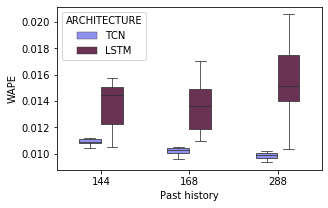

In [5]:
top_by_pasthistory = pd.DataFrame(columns=['PAST_HISTORY','ARCHITECTURE', METRIC])

for ph, _results in results.groupby('PAST_HISTORY'):
    for arch, __results in _results.groupby('ARCHITECTURE'):
        top_by_pasthistory = top_by_pasthistory.append(__results.reset_index().sort_values(METRIC)[['PAST_HISTORY','ARCHITECTURE', METRIC]].head(21), ignore_index=True)

fig, ax = plt.subplots(1,1,figsize=(4.75,3))
sns.boxplot(data=top_by_pasthistory, x='PAST_HISTORY', y=METRIC, hue='ARCHITECTURE', linewidth=0.75, palette=cmap, width=0.5, whis=100, hue_order=['TCN', 'LSTM'], ax=ax)    
ax.set_xlabel('Past history')
ax.set_ylabel(METRIC.upper())
fig.savefig('../files/images/ED-ResultsDistribution-pastHistory.eps'.format(ph), format='eps', bbox_inches='tight')

fig.show()

In [6]:
top_tcn = results[results['ARCHITECTURE']=='TCN'].sort_values(METRIC).head(1)
print('TCN')
print('\t'+'\n\t'.join(['{}: {}'.format(k,v) for k,v in zip(top_tcn.index.names,top_tcn.index[0])]))
print('\tEPHOCS: '+str(top_tcn[['EPOCHS']].values[0][0]))


top_lstm = results[results['ARCHITECTURE']=='LSTM'].sort_values(METRIC).head(1)
print('LSTM')
print('\t'+'\n\t'.join(['{}: {}'.format(k,v) for k,v in zip(top_lstm.index.names,top_lstm.index[0])]))
print('\tEPHOCS: '+str(top_lstm[['EPOCHS']].values[0][0]))

TCN
	MODEL: TCN_1218
	MODEL_DESCRIPTION: {'nb_filters': 128, 'kernel_size': 6, 'nb_stacks': 2, 'dilations': [1, 3, 6, 12, 24], 'dropout_rate': 0}
	FORECAST_HORIZON: 24
	PAST_HISTORY: 288
	BATCH_SIZE: 128
	EPHOCS: 50
LSTM
	MODEL: LSTM_5
	MODEL_DESCRIPTION: {'num_stack_layers': 2, 'units': 128, 'dropout': 0}
	FORECAST_HORIZON: 24
	PAST_HISTORY: 288
	BATCH_SIZE: 64
	EPHOCS: 50


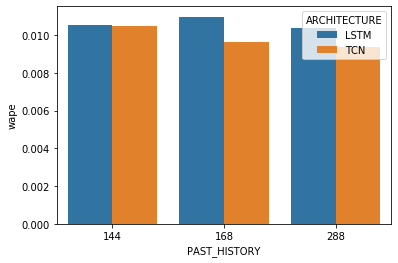

PAST_HISTORY,144,168,288
ARCHITECTURE,,,
LSTM,0.010521,0.010962,0.010387
TCN,0.010450,0.009612,0.009342


In [7]:
top_by_pasthistory = pd.DataFrame(columns=['PAST_HISTORY','ARCHITECTURE', METRIC])

for ph, _results in results.groupby('PAST_HISTORY'):
    for arch, __results in _results.groupby('ARCHITECTURE'):
        top_by_pasthistory = top_by_pasthistory.append(__results.reset_index().sort_values(METRIC)[['PAST_HISTORY','ARCHITECTURE', METRIC]].head(1), ignore_index=True)

sns.barplot(data=top_by_pasthistory, x='PAST_HISTORY', y=METRIC, hue='ARCHITECTURE')
plt.show()

top_by_pasthistory.pivot(index='ARCHITECTURE', columns='PAST_HISTORY', values=METRIC)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

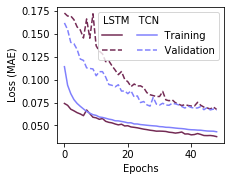

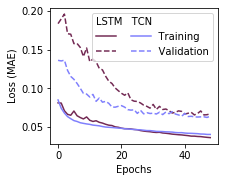

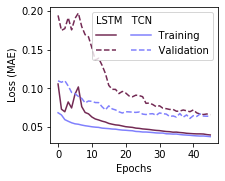

In [8]:
RESULT_FILE = '../files/results/experimental_results_ED-loss.csv'
results = pd.read_csv(RESULT_FILE, delimiter=";")
results['ARCHITECTURE'] = results['MODEL'].map(lambda x: 'LSTM' if 'LSTM' in x else ('TCN' if 'TCN' in x else 'NONE'))
index_rows = results[['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE']].copy()
results = results.set_index(['MODEL', 'MODEL_DESCRIPTION', 'FORECAST_HORIZON', 'PAST_HISTORY', 'BATCH_SIZE'])

for i, (ph, _results) in enumerate(results[results['EPOCHS']==50].groupby('PAST_HISTORY')):
    fig,ax = plt.subplots(1,1, figsize=(3,2.5))
    line_columns = []
    for arch, __results in _results.groupby('ARCHITECTURE'):
        loss = np.fromstring(__results.sort_values(METRIC).head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
        val_loss = np.fromstring(__results.sort_values(METRIC).head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
          
        loss, val_loss = (loss[1:], val_loss[1:]) if i < 2 else (loss[4:], val_loss[4:])
        
        loss_line = ax.plot(loss, label=('loss',arch), c=cmap[arch])
        valloss_line = ax.plot(val_loss, label=('val',arch), c=cmap[arch], linestyle='--')
        
        line_columns.append(loss_line[0])
        line_columns.append(valloss_line[0])
        
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss (MAE)')
#         ax.set_title('Past history '+str(ph))
    
    # Create legend
    leg = ax.legend(line_columns, ['', '', '    Training', '    Validation'], 
             title='LSTM   TCN                  ', handletextpad=-0.5,  
             ncol=2, numpoints=1)
    fig.savefig('../files/images/ED-loss_50epochs_{}PastHistory.eps'.format(ph), format='eps', bbox_inches='tight')
